## A visual representation of named colors

I looked into word embeddings for my bachelor thesis and stumbled into a great GitHub Gist by [Allison Parrish](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469) titled "Understanding word vectors". Her Gist is very educational, explaining everything from the ground up. However, the section about colors as vectors did not show the colors being discussed. Since I am a visual learner, I wanted to implement some way of plotting the colors to see them. I realized that this could be a handy tool in other circumstances, and I have extracted what I made and modified it to work without her Gists context.

### Color basis
Let's start by loading the color information from Darius Kazemi's GitHub repository containing a [JSON file](https://github.com/dariusk/corpora/blob/master/data/colors/xkcd.json) with the xkcd color names and values.

In [1]:
import urllib.request, json

# read json data
with urllib.request.urlopen("https://raw.githubusercontent.com/dariusk/corpora/master/data/colors/xkcd.json") as url:
    color_data = json.loads(url.read().decode())

I want to make a dictionary that holds the hex, integer, and normalized integer values, so the first step is to create a function that converts hex to a tuple with RGB values.

In [2]:
def hex_to_int(color):
    """
    Converts hexcolor codes to tuple of integers.

    Args:
        color (str): hex color code.

    Returns:
        tuple: RGB values as integers.
    """
    color = color.lstrip("#")
    return int(color[:2], 16), int(color[2:4], 16), int(color[4:6], 16)

Now, I am ready to define the new color dictionary, which holds all the mentioned values.

In [3]:
# Define one dictionary with name as key
colors: dict = {}

for i in color_data["colors"]:
    temp = list(i.values())

    # hex color as value
    val_hex = temp[1]

    # int (RGB 0-255) color as value
    val_int = hex_to_int(temp[1])

    # normalized int (0-1) color as value
    val_norm = tuple([x / 255 for x in val_int])

    # combine to dict
    colors[temp[0]] = {"hex": val_hex, "int": val_int, "norm": val_norm}

Let's see look at some results.

In [4]:
print("Sample of 5 colors with hex values")
names = [x[0] for x in list(colors.items())[0:5]]
values = [colors[x]["hex"] for x in names]
display(list(zip(names, values)))

print("Sample of 5 colors with int values")
names = [x[0] for x in list(colors.items())[0:5]]
values = [colors[x]["int"] for x in names]
display(list(zip(names, values)))

print("Sample of 5 colors with normalized int values")
names = [x[0] for x in list(colors.items())[0:5]]
values = [colors[x]["norm"] for x in names]
display(list(zip(names, values)))

Sample of 5 colors with hex values


[('cloudy blue', '#acc2d9'),
 ('dark pastel green', '#56ae57'),
 ('dust', '#b2996e'),
 ('electric lime', '#a8ff04'),
 ('fresh green', '#69d84f')]

Sample of 5 colors with int values


[('cloudy blue', (172, 194, 217)),
 ('dark pastel green', (86, 174, 87)),
 ('dust', (178, 153, 110)),
 ('electric lime', (168, 255, 4)),
 ('fresh green', (105, 216, 79))]

Sample of 5 colors with normalized int values


[('cloudy blue', (0.6745098039215687, 0.7607843137254902, 0.8509803921568627)),
 ('dark pastel green',
  (0.33725490196078434, 0.6823529411764706, 0.3411764705882353)),
 ('dust', (0.6980392156862745, 0.6, 0.43137254901960786)),
 ('electric lime', (0.6588235294117647, 1.0, 0.01568627450980392)),
 ('fresh green',
  (0.4117647058823529, 0.8470588235294118, 0.30980392156862746))]

Let's test if we can give a color name as input and get the values back.

In [5]:
print("Test for the color 'red':")
display(colors["red"])

Test for the color 'red':


{'hex': '#e50000', 'int': (229, 0, 0), 'norm': (0.8980392156862745, 0.0, 0.0)}

### Making it visible
There was already an excellent function for plotting colors in the [Matplotlib documentation](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), so I copied it and made some small changes to better suit my needs.

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title="Colors", sort_colors=True, emptycols=0, title_size=18, text_size=14):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=title_size, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=text_size,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

Since a predefined function is used for plotting, a function that generates the needed input is defined.

In [7]:
def make_selection_dict(names, color_index, val_type="hex"):
    """
    Makes a dictionary for the selected colors and their values.

    Args:
        names (list): color names
        color_index (dict): All avaliable colors.
        val_type (str, optional): value return type. Defaults to "hex".

    Returns:
        [dict]: color names and values.
    """
    value_list: list = []
    
    # Makes a list of color values based on the input and desired return type.
    for i in names:
        value_list.append(color_index[i][val_type])
    
    # Combines the names and values in a dictionary.
    return {k: v for k, v in zip(names, value_list)}

Let's make a list of colors and test that the new function returns "hex" values.

In [8]:
color_selection = ["red", "green", "blue"]

display(selection := make_selection_dict(color_selection, colors, "hex"))

{'red': '#e50000', 'green': '#15b01a', 'blue': '#0343df'}

Now the time to see the actual colors is here.

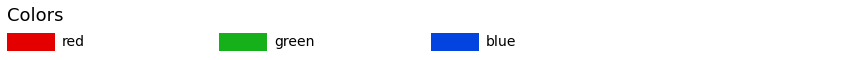

In [9]:
plot_colortable(selection, sort_colors=False, emptycols=1);

### Finding shades of a color
Allison's Gist had some functions that enabled us to find the n closest colors to our selection based on euclidean distance. I have combined some of her functions and made alterations to them to better suit my needs.

In [10]:
def closest(color_index, color_val, n=10):
    """
    Defines a list of n closest colors to the input color.

    Args:
        color_index (dict): All avaliable colors.
        color_val (dict): Base color.
        n (int, optional): Number of closest colors. Defaults to 10.

    Returns:
        list: Names of closest colors.
    """
    from scipy.spatial.distance import euclidean
    closest = []
    if isinstance(color_val, dict):
        for key in sorted(color_index.keys(),
                          key=lambda x: euclidean(color_val["int"],
                                                  color_index[x]["int"]))[:n]:
            closest.append(key)
    elif isinstance(color_val, list):
        for key in sorted(
                color_index.keys(),
                key=lambda x: euclidean(color_val, color_index[x]["int"]))[:n]:
            closest.append(key)
    return closest

Let's find the 6 closest colors to "red".

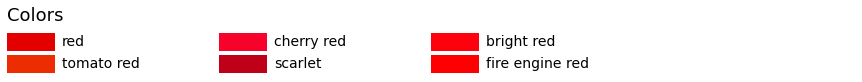

In [59]:
color_selection = closest(colors, colors["red"], 6)
selection = make_selection_dict(color_selection, colors, "hex")  # <-- using hex
plot_colortable(selection, emptycols=1);

Let's find the 6 closest colors to "green".

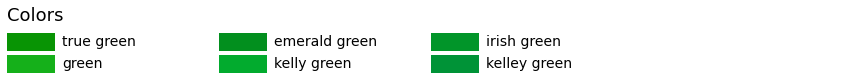

In [58]:
color_selection = closest(colors, colors["green"], 6)
selection = make_selection_dict(color_selection, colors, "norm")  # <-- using norm
plot_colortable(selection, emptycols=1);

Let's find the 12 closest colors to "pure blue", by using the RGB values. 

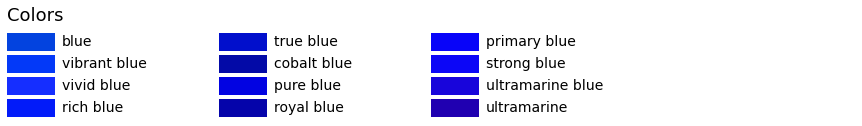

In [57]:
color_selection = closest(colors, [3, 6, 223], 12)
selection = make_selection_dict(color_selection, colors, "hex")
plot_colortable(selection, emptycols=1);

### Playing with vectors
The following functions are copied as they were from the previously mentioned Gist since they do the intended job, and I don't see any need to alter them.

#### Subtract one color from another
Let's test subtracting "magenta" from "cyan".

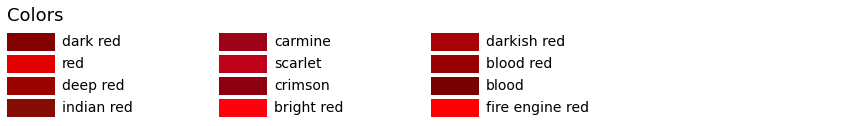

In [60]:
def subtractv(coord1, coord2):
    return [c1 - c2 for c1, c2 in zip(coord1, coord2)]

# Have to use "int" in the subtractv function
color_selection = closest(colors, subtractv(colors['magenta']["int"], colors['cyan']["int"]), 12)
selection = make_selection_dict(color_selection, colors, "hex")
plot_colortable(selection, emptycols=1);

#### Add one color to another
Let's test adding "royal" with "teal".

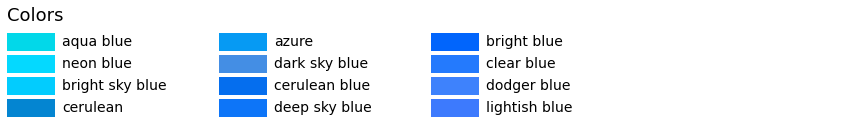

In [61]:
def addv(coord1, coord2):
    return [c1 + c2 for c1, c2 in zip(coord1, coord2)]

# Have to use "int" in the addv function
color_selection = closest(colors, addv(colors['royal']["int"], colors['teal']["int"]), 12)
selection = make_selection_dict(color_selection, colors, "hex")
plot_colortable(selection, emptycols=1);

#### Find the average of a list
Let's test finding the average of black and white.

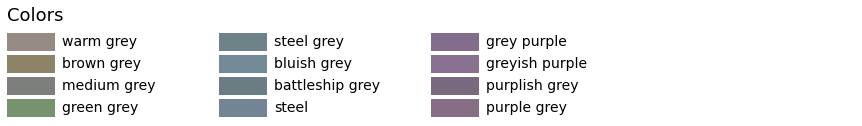

In [64]:
def meanv(coords):
    # assumes every item in coords has same length as item 0
    sumv = [0] * len(coords[0])
    for item in coords:
        for i in range(len(item)):
            sumv[i] += item[i]
    mean = [0] * len(sumv)
    for i in range(len(sumv)):
        mean[i] = float(sumv[i]) / len(coords)
    return mean
meanv([[0, 1], [2, 2], [4, 3]])

# Have to use "int" in the meanv function
color_selection = closest(colors, meanv([colors['black']["int"], colors['white']["int"]]), 12)
selection = make_selection_dict(color_selection, colors, "hex")
plot_colortable(selection, emptycols=1);

#### Finding random colors

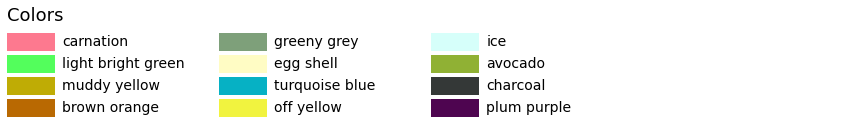

In [87]:
import random

color_selection = random.sample(colors.keys(), 12)
selection = make_selection_dict(color_selection, colors, "hex")
plot_colortable(selection, sort_colors=False, emptycols=1);

#### Every n color in range

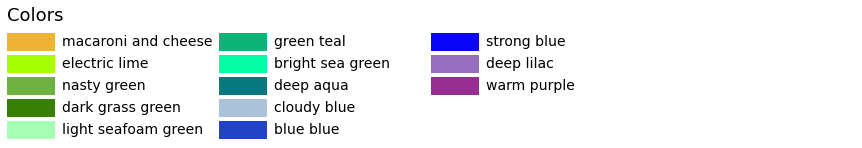

In [88]:
color_selection = [list(colors.keys())[x] for x in range(0, 37, 3)]
selection = make_selection_dict(color_selection, colors, "hex")
plot_colortable(selection, emptycols=1);